
**Total: 200 Marks**

# ☕ Coffee Shop Revenue Prediction - Regression Models

Welcome! This assignment is designed to help you explore and implement various regression algorithms to predict daily revenue for coffee shops. Follow the instructions below and answer each question with both code and explanations where required.

---

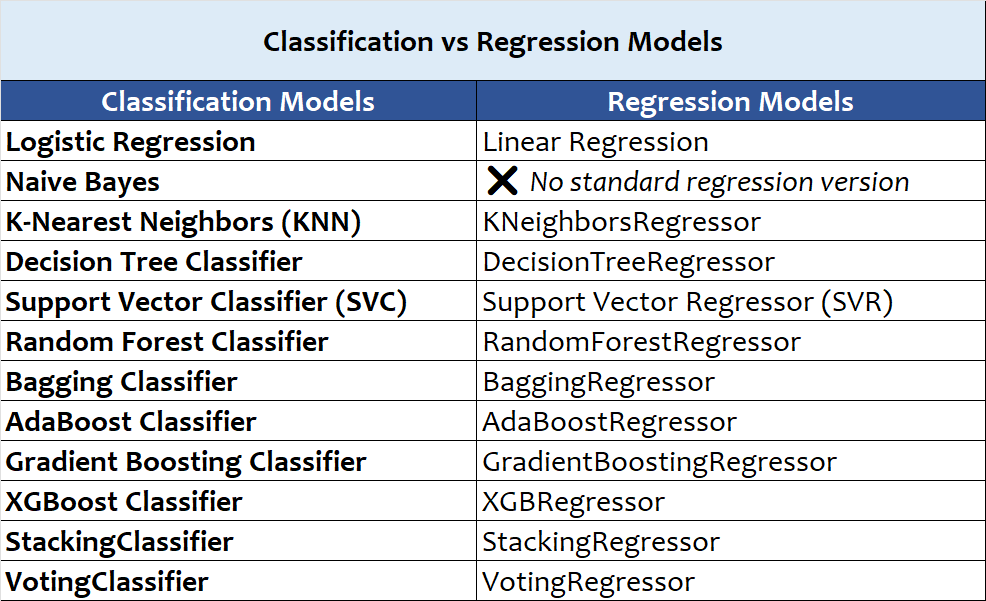

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from xgboost import XGBRegressor

# Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

# Stacking and Voting
stacking = StackingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
], final_estimator=LinearRegression())

voting = VotingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])

# Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - MSE: {mse:.4f}")


Linear Regression - MSE: 0.0115
KNN - MSE: 15784.4215
Decision Tree - MSE: 24753.5195
SVR - MSE: 36147.3704
Random Forest - MSE: 8941.7377
Bagging - MSE: 11213.9999
AdaBoost - MSE: 11222.6706
Gradient Boosting - MSE: 3859.6875
XGBoost - MSE: 7768.9477
Stacking - MSE: 2886.2789
Voting - MSE: 5904.8269


#  Coffee Shop Revenue Dataset

##  About Dataset

This dataset contains **2,000 rows** of data from coffee shops, offering detailed insights into factors that influence **daily revenue**.  
It includes key operational and environmental variables that provide a comprehensive view of how business activities and external conditions affect sales performance.

Designed for use in **predictive analytics and business optimization**, this dataset is a valuable resource for anyone looking to understand the relationship between **customer behavior**, **operational decisions**, and **revenue generation** in the **food and beverage industry**.

---

##  Columns & Variables

The dataset features a variety of columns capturing **operational details**, **customer activity**, and **external factors** such as **marketing spend** and **location foot traffic**.

### 1. `Number of Customers Per Day`
- The total number of customers visiting the coffee shop on any given day.
- **Range:** 50 - 500 customers

### 2. `Average Order Value ($)`
- The average dollar amount spent by each customer during their visit.
- **Range:** $2.50 - $10.00

### 3. `Operating Hours Per Day`
- The total number of hours the coffee shop is open for business each day.
- **Range:** 6 - 18 hours

### 4. `Number of Employees`
- The number of employees working on a given day.
- Can influence service speed, customer satisfaction, and ultimately, sales.
- **Range:** 2 - 15 employees

### 5. `Marketing Spend Per Day ($)`
- The amount of money spent on marketing campaigns or promotions on any given day.
- **Range:** $10 - $500 per day

### 6. `Location Foot Traffic (people/hour)`
- The number of people passing by the coffee shop per hour.
- Indicative of the shop's **location quality** and **potential customer base**.
- **Range:** 50 - 1000 people/hour

---

##  Target Variable

### `Daily Revenue ($)`
- The **dependent variable** representing the total revenue generated by the coffee shop each day.
- It is influenced by customer visits, average spending, marketing spend, and staff availability.
- **Range:** $200 - $10,000 per day




##  1. Load the Data — *[5 Marks]*
- Load the dataset using `pandas`
- Display the first few rows

---

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("coffee_shop_revenue.csv")  # Use the exact filename
df.head()



Saving coffee_shop_revenue.csv to coffee_shop_revenue.csv


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


##  2. Data Inspection — *[10 Marks]*
- Show the shape of the dataset
- Use `.info()` to display data types and null values
- Show value counts (if applicable)

---

In [2]:
# Step 2: Data Inspection — [10 Marks]

# Shape of the dataset
print("Shape:", df.shape)

# Data types and missing values
df.info()

# Value counts (only for object/categorical columns)
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


Shape: (2000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB



##  3. Data Cleaning — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables (if any)
- Convert data types where needed

---

In [3]:
# Step 3: Data Cleaning — [15 Marks]

# 1. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 2. Handle missing values (if any) — this dataset has none, so no action is needed
# If there were any, you could fill or drop like this:
# df = df.dropna() or df['column'] = df['column'].fillna(value)

# 3. Check for categorical columns (object type)
print("\nData types before encoding:")
print(df.dtypes)

# Encode categorical variables if there are any
# This dataset has no categorical columns, so nothing to encode

# 4. Convert data types if needed (not needed here, but here's how)
# Example: df['column'] = df['column'].astype(int)

print("\nData types after cleaning:")
print(df.dtypes)


Missing values in each column:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

Data types before encoding:
Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object

Data types after cleaning:
Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


##  4. Data Description — *[10 Marks]*
- Use `.describe()` on numerical features
- List unique values for any categorical variables

---

In [18]:
# 1. Summary statistics for numerical columns
df.describe()





,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [20]:
# 2. Unique values for categorical columns (if any)

has_object = False
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        has_object = True

if not has_object:
    print("No categorical columns found in the dataset.")

No categorical columns found in the dataset.


##  5. Univariate Analysis — *[20 Marks]*
- Plot **individual** distributions for all numerical features
  - Use histograms
- Include bar plots for any categorical variables
- Add comments on observed distributions  

---

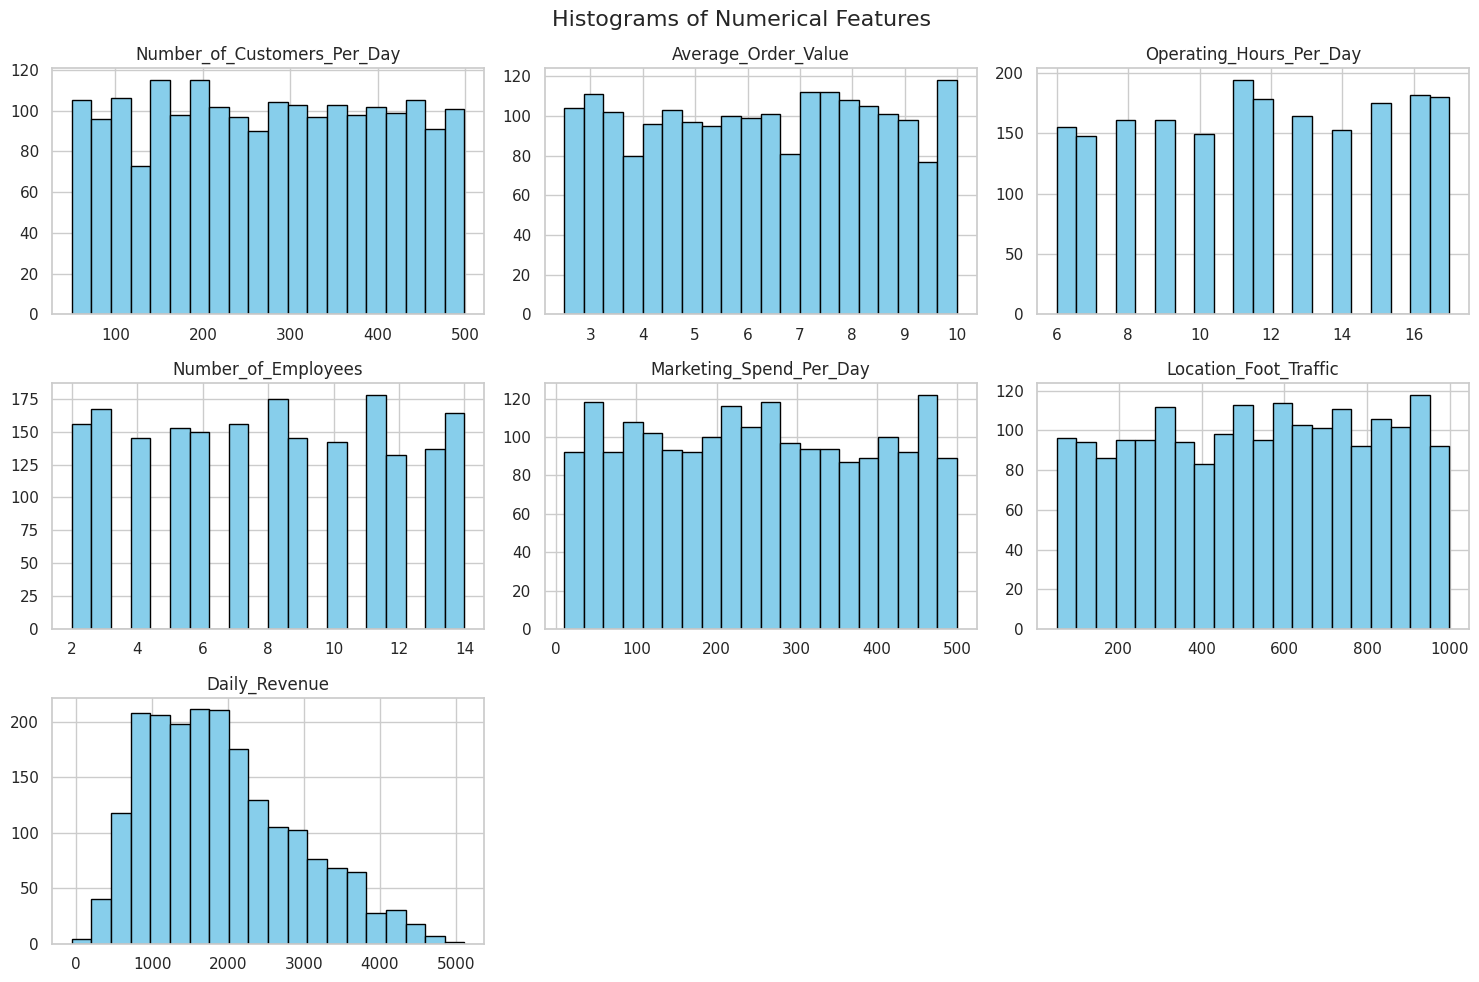

In [21]:
# Step 5: Univariate Analysis — [20 Marks]

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histograms for all numeric features
df.hist(bins=20, figsize=(15, 10), edgecolor='black', color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


Comment block for interpretation:
# Observations:

- `Number_of_Customers_Per_Day` appears to be right-skewed, indicating most days have fewer customers.
- `Average_Order_Value` is fairly normally distributed, with a clear center.
- `Operating_Hours_Per_Day` likely has discrete values (e.g., 8, 10, 12), showing fewer unique values.
- `Marketing_Spend_Per_Day` may be right-skewed — a few days have high spend.
- `Daily_Revenue` is right-skewed, with most days having moderate revenue and fewer very high-revenue days.


##  6. Bivariate Analysis — *[20 Marks]*
- Analyze the relationship of each independent variable with `Daily Revenue`
  - Use box plots, violin plots, scatter plots
  - Use `groupby()` for statistical summaries
- Add plots and comments

---

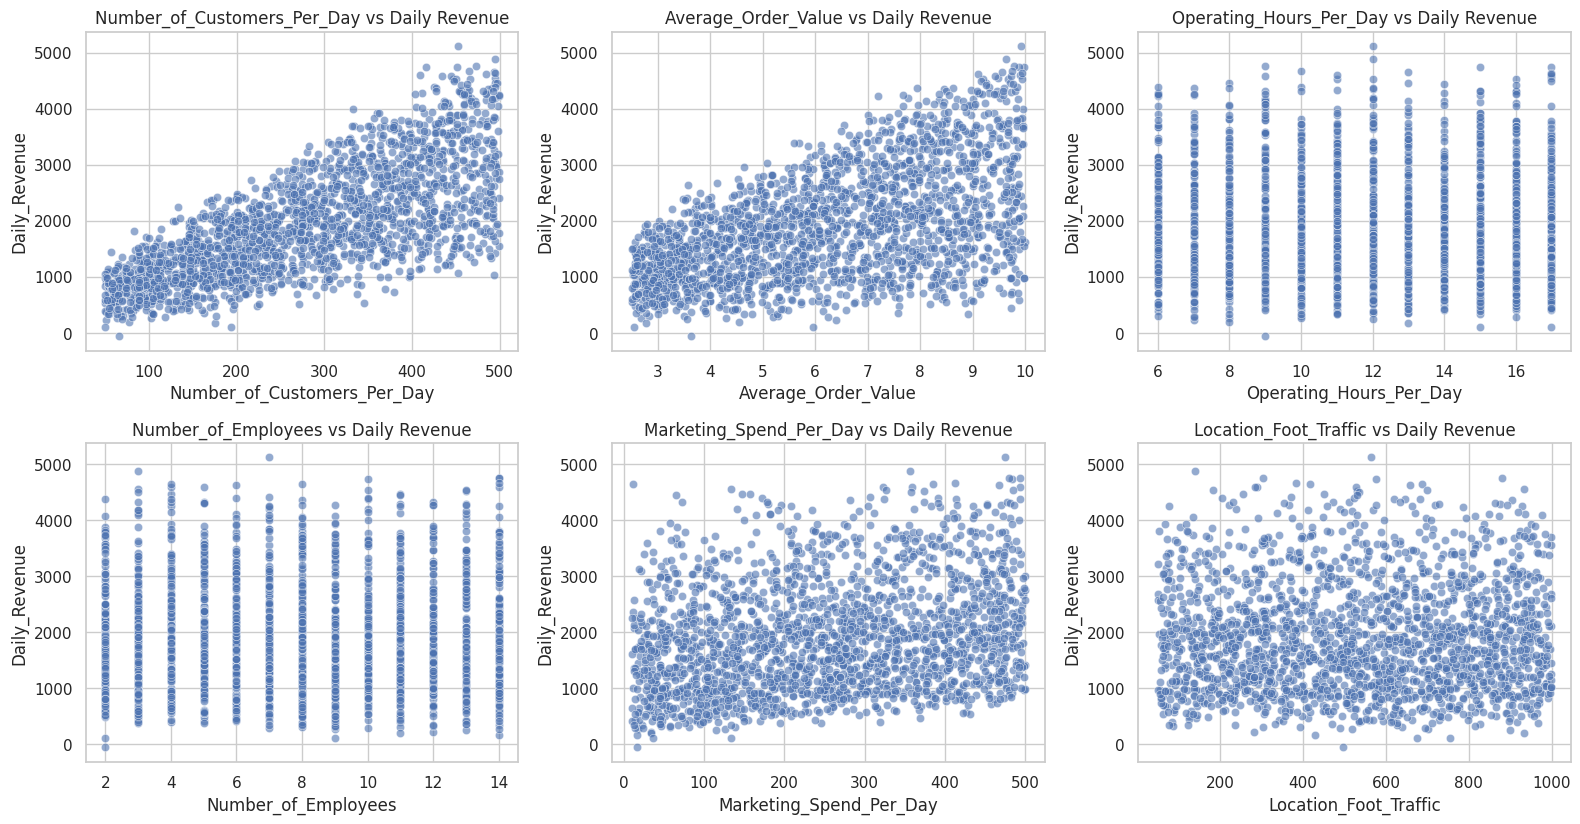

In [22]:
#Step 6: Bivariate Analysis – Relationship with Daily_Revenue
#A. Scatter Plots — Revenue vs Numeric Features
# Scatter plots to see relationships with Daily Revenue
import matplotlib.pyplot as plt
import seaborn as sns

features = [col for col in df.columns if col != 'Daily_Revenue']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['Daily_Revenue'], alpha=0.6)
    plt.title(f'{feature} vs Daily Revenue')
plt.tight_layout()
plt.show()


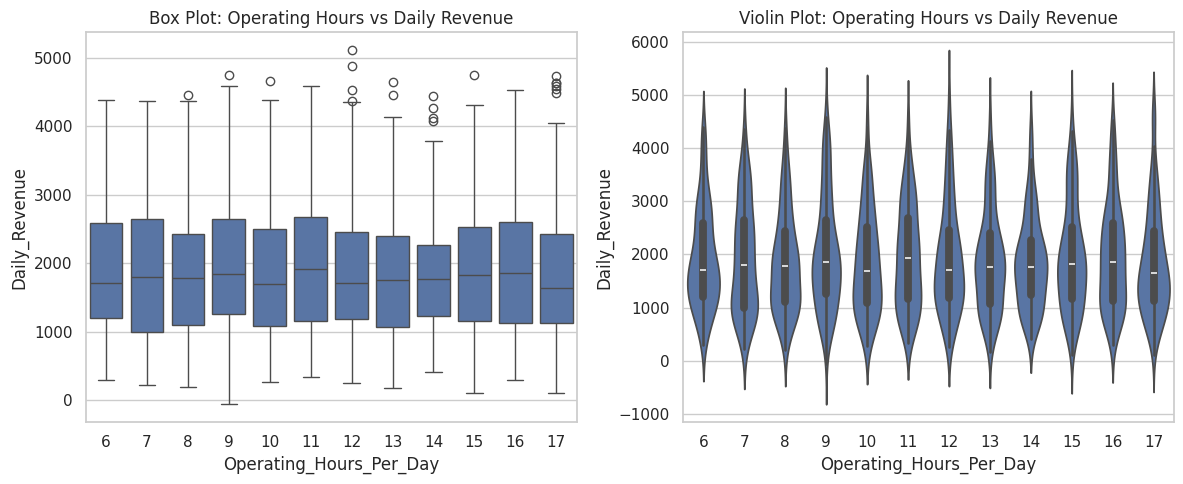

In [23]:
#B. Violin and Box Plots (for discrete-like numeric columns)
# Box and violin plots for discrete-style features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Operating_Hours_Per_Day', y='Daily_Revenue', data=df)
plt.title('Box Plot: Operating Hours vs Daily Revenue')

plt.subplot(1, 2, 2)
sns.violinplot(x='Operating_Hours_Per_Day', y='Daily_Revenue', data=df)
plt.title('Violin Plot: Operating Hours vs Daily Revenue')

plt.tight_layout()
plt.show()


    Operating_Hours_Per_Day  Daily_Revenue
0                         6    1924.378710
1                         7    1929.301486
2                         8    1847.814037
3                         9    2018.685901
4                        10    1854.766242
5                        11    1960.089948
6                        12    1938.236573
7                        13    1880.846402
8                        14    1852.569281
9                        15    1966.443486
10                       16    1969.335769
11                       17    1845.876167


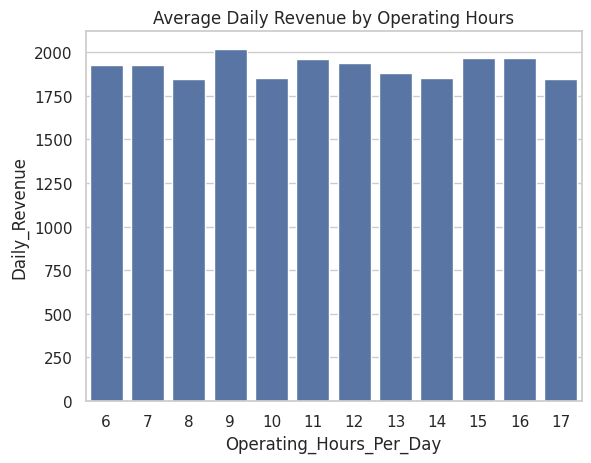

In [24]:
#C. Groupby Summaries
# Group by Operating Hours for average revenue
grouped = df.groupby('Operating_Hours_Per_Day')['Daily_Revenue'].mean().reset_index()
print(grouped)

# Bar plot of the groupby result
sns.barplot(x='Operating_Hours_Per_Day', y='Daily_Revenue', data=grouped)
plt.title("Average Daily Revenue by Operating Hours")
plt.show()


Interpretation:
# Observations:

- There's a strong positive relationship between `Number_of_Customers_Per_Day` and `Daily_Revenue`.
- `Average_Order_Value` also correlates positively, suggesting customers spending more raises revenue.
- `Marketing_Spend_Per_Day` shows increasing revenue but with more spread (not always efficient).
- Revenue increases with more `Operating_Hours_Per_Day`, but benefits may taper off.
- Box and violin plots confirm that higher operating hours usually bring higher average revenue, though with some variance.


##  7. Multivariate Analysis — *[10 Marks]*
- Use seaborn's `pairplot()` to visualize pairwise relationships
- Discuss any interesting interactions influencing revenue

---

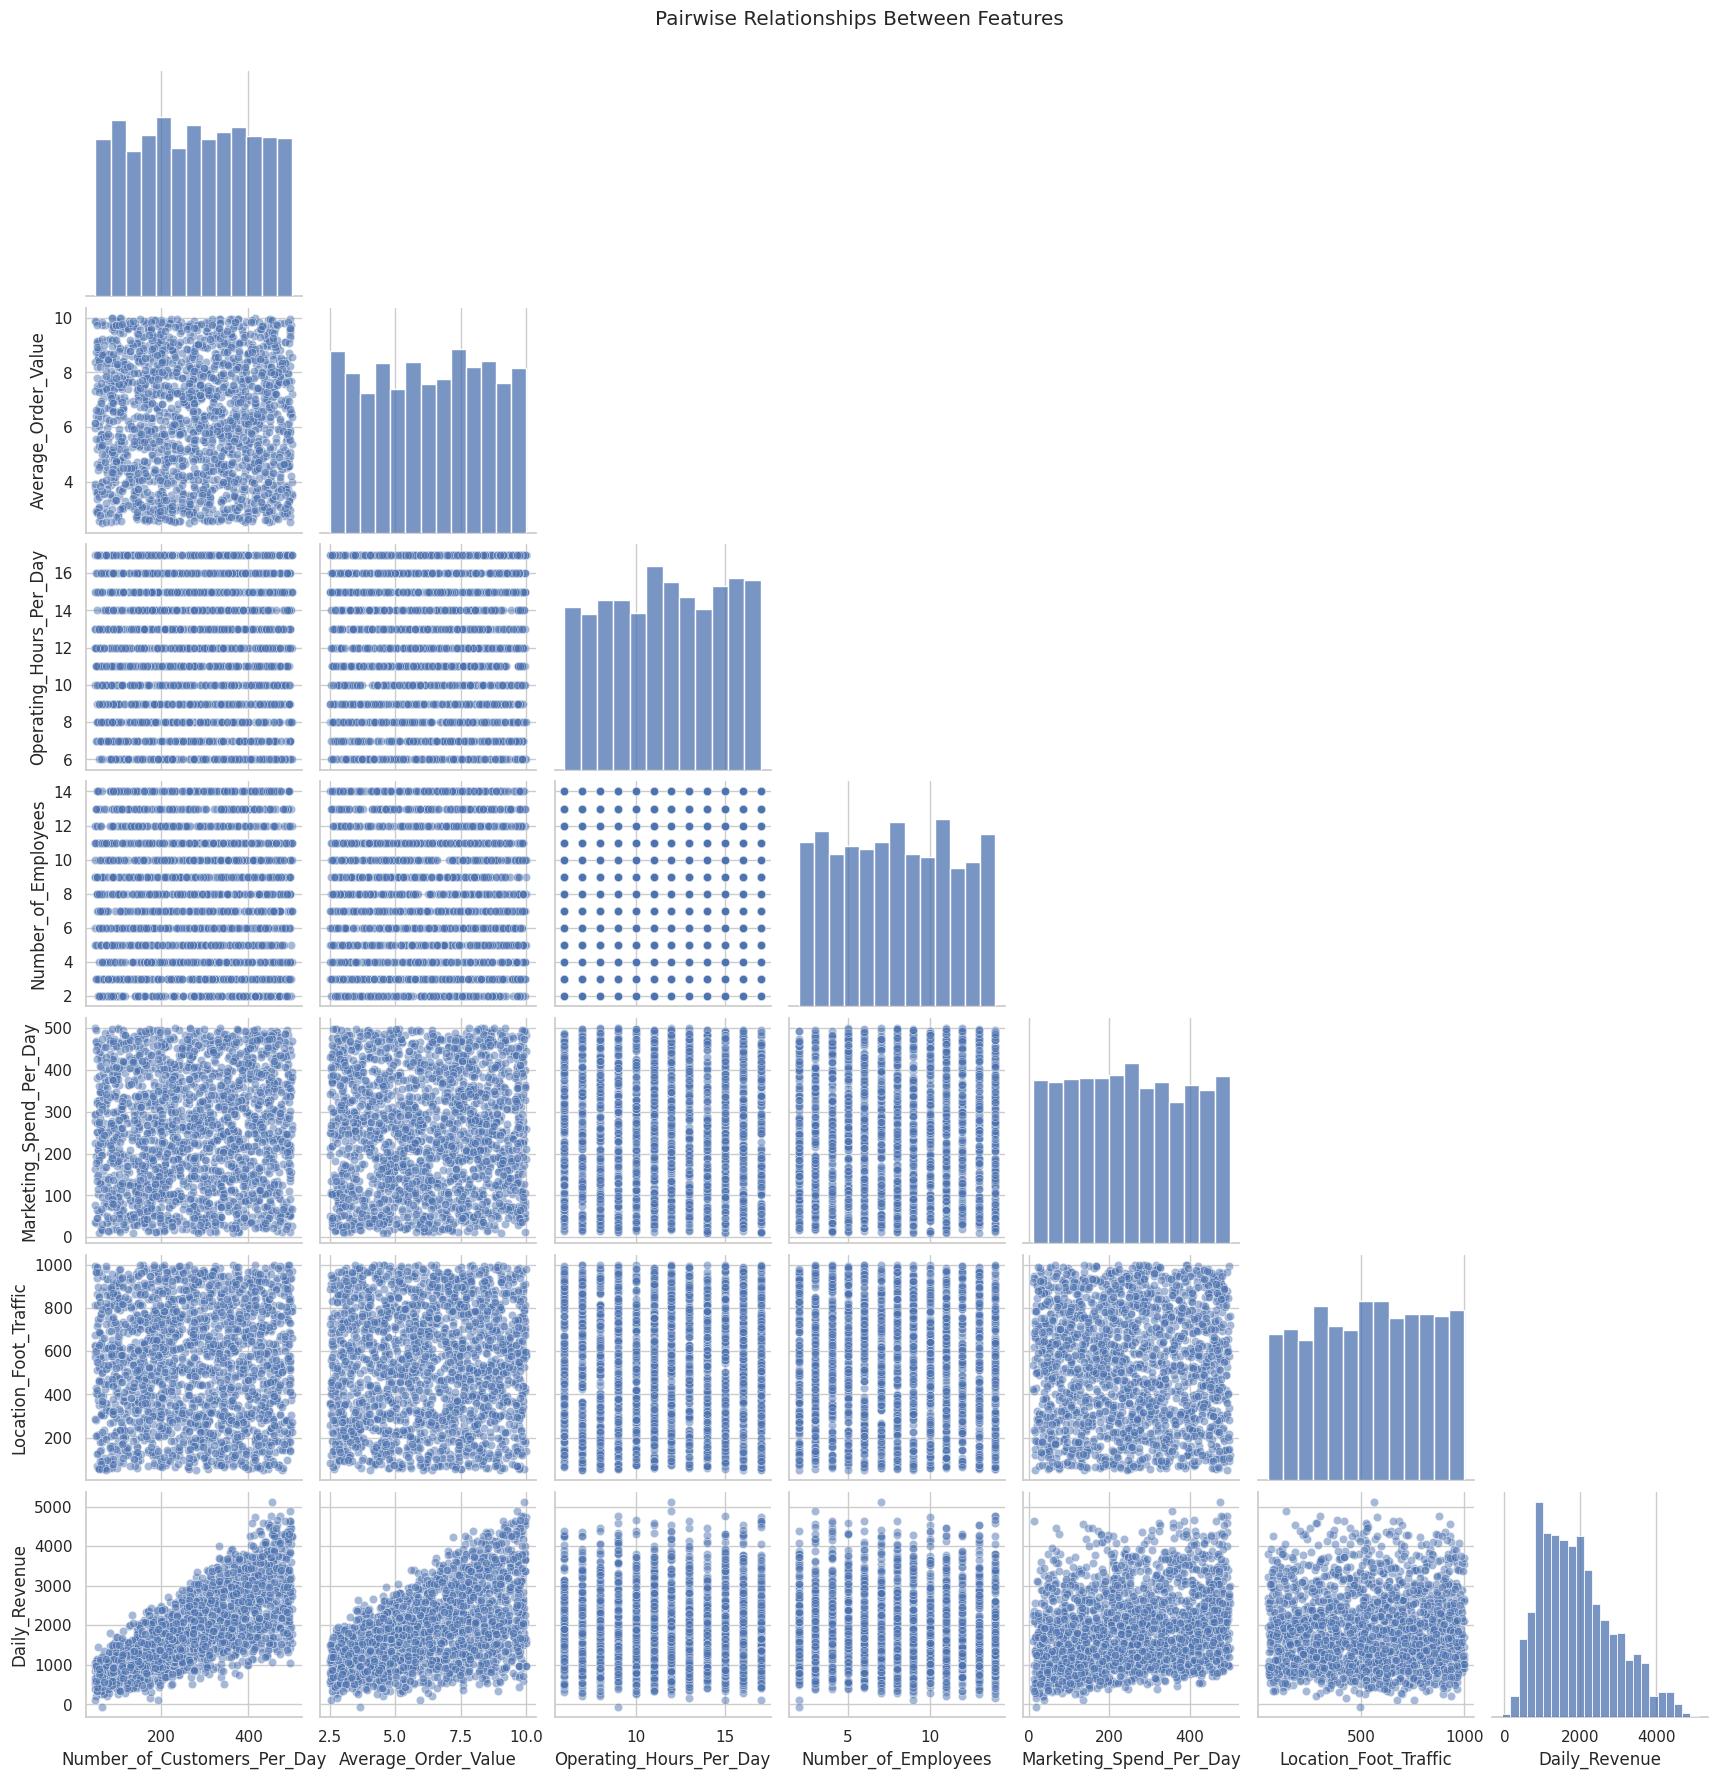

In [25]:
# Step 7: Multivariate Analysis — [10 Marks]

import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for all features
sns.pairplot(df, corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()



# Observations:

- Strong positive linear relationships are visible between:
  - `Number_of_Customers_Per_Day` and `Daily_Revenue`
  - `Average_Order_Value` and `Daily_Revenue`
- `Marketing_Spend_Per_Day` shows a weaker, scattered relationship with `Daily_Revenue` — possibly due to diminishing returns or indirect effects.
- Some features, like `Operating_Hours_Per_Day`, show clustered values — likely due to fixed schedule ranges (e.g., 8, 10, 12 hours).


##  8. Heatmap – Correlation Matrix — *[10 Marks]*
- Create a correlation matrix using `.corr()`
- Plot with `seaborn.heatmap()`
- Identify features most correlated with `Daily Revenue`

---

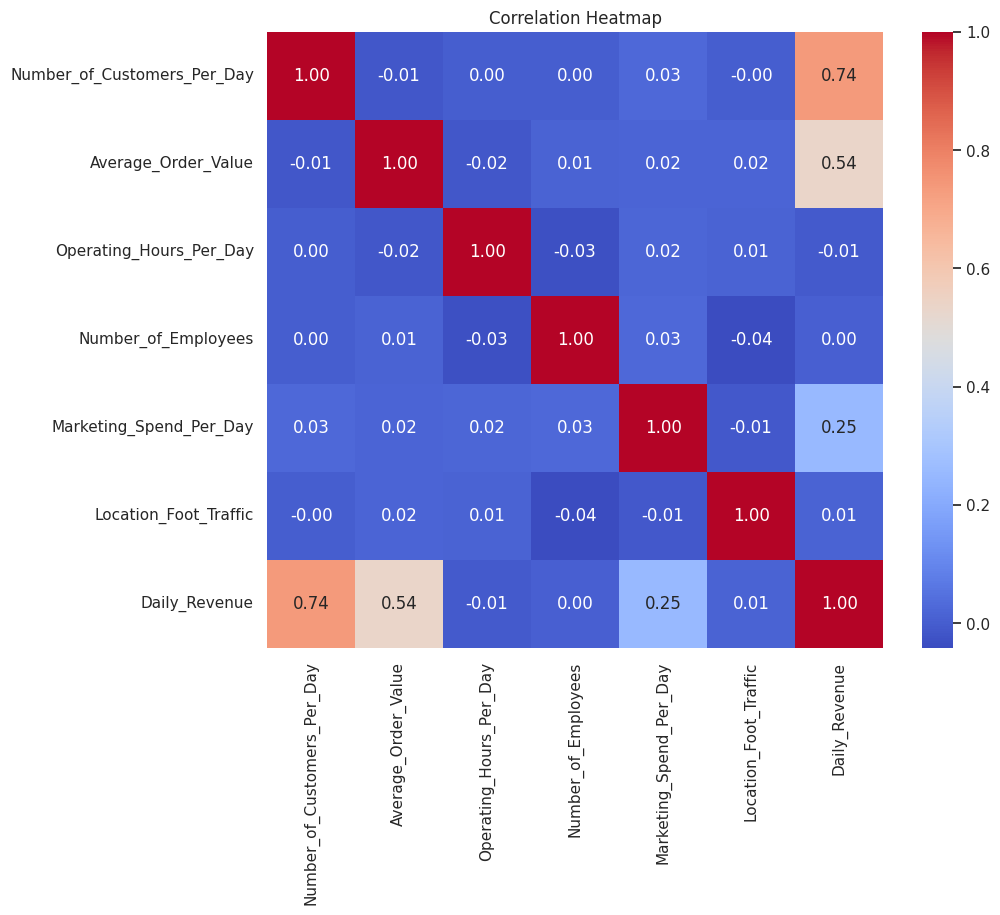

In [26]:
# Step 8: Correlation Matrix — [10 Marks]

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


# Observations:

- `Number_of_Customers_Per_Day` has the highest positive correlation with `Daily_Revenue`.
- `Average_Order_Value` also shows strong positive correlation with revenue.
- `Marketing_Spend_Per_Day` has a moderate correlation, suggesting its effect is not always direct.
- Other features like `Operating_Hours_Per_Day` and `Number_of_Employees` have weaker or less consistent correlations.


##  10. Feature Scaling — *[5 Marks]*
- Standardize or normalize the dataset using:
  - `StandardScaler` or `MinMaxScaler`
- Justify why scaling is needed before model building

---

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Assuming 'df' is your DataFrame

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Standardization: Mean = 0, Std Dev = 1
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=numeric_cols)

# Normalization: Range [0, 1]
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=numeric_cols)

# Display the first few rows of each
print("Standardized Data:")
print(df_standardized.head())

print("\nNormalized Data:")
print(df_normalized.head())



Standardized Data:
   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                    -0.945031             0.220102                 0.678642   
1                     1.628195            -0.809647                 0.096866   
2                     0.955911             1.300418                -1.648463   
3                     0.353173             1.019996                 1.551306   
4                    -0.914121             0.541898                 1.551306   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0            -1.054986                -1.034681              -1.612307   
1             0.014166                -1.380462               0.769922   
2            -0.520410                -1.139995               0.372270   
3            -1.054986                 1.488411               0.865653   
4            -1.589562                 1.133274              -1.115242   

   Daily_Revenue  
0      -0.378618  
1       0.171477 

Why Feature Scaling is Needed
Feature scaling is essential before building many machine learning models for the following reasons:

Uniform Scale Ensures Fair Contribution:

Features like "Revenue" or "Rent" might have values in thousands, while "Rating" might be between 0 and 5.

Algorithms like KNN, SVM, and gradient descent-based models (like linear/logistic regression) are sensitive to feature magnitude. Features with larger scales can dominate the model.

Faster Convergence:

Models that use gradient descent converge faster when features are on similar scales.

Improved Accuracy:

Properly scaled features often lead to better model performance and stability.




##  11. Model Building — *[50 Marks]*
Implement the following **regression models**:

1. **Linear Regression**
2. **K-Nearest Neighbors Regressor (KNN)**
3. **Decision Tree Regressor**
4. **Support Vector Regressor (SVR)**
5. **Random Forest Regressor**
6. **Bagging Regressor**
7. **AdaBoost Regressor**
8. **Gradient Boosting Regressor**
9. **XGBoost Regressor**
10. **Stacking Regressor**
11. **Voting Regressor**
12. **Neural Network Regressor** (`MLPRegressor` or using `Keras`)



---

In [40]:
# 1. Upload local dataset in Google Colab
from google.colab import files
uploaded = files.upload()

# 2. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 3. Load uploaded CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# 4. Define features and target
X = df.drop(columns='Daily_Revenue')   # Input features
y = df['Daily_Revenue']                # Target variable

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train all regressors

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

# 3. Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# 4. Support Vector Regressor
svr = SVR()
svr.fit(X_train_scaled, y_train)

# 5. Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# 6. Bagging Regressor
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

# 7. AdaBoost Regressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

# 8. Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# 9. XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# 10. Stacking Regressor
stacking = StackingRegressor(
    estimators=[
        ('knn', KNeighborsRegressor()),
        ('dt', DecisionTreeRegressor())
    ],
    final_estimator=LinearRegression()
)
stacking.fit(X_train, y_train)

# 11. Voting Regressor
voting = VotingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor()),
        ('gbr', GradientBoostingRegressor())
    ]
)
voting.fit(X_train, y_train)

# 12. Neural Network Regressor (MLP)
mlp = MLPRegressor(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print("✅ All 12 models trained successfully with 'Daily_Revenue' as the target.")






Saving coffee_shop_revenue.csv to coffee_shop_revenue (1).csv
✅ All 12 models trained successfully with 'Daily_Revenue' as the target.


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


##  12. Model Evaluation — *[20 Marks]*
Evaluate all models using:
- **MAE** (Mean Absolute Error)
- **MSE** (Mean Squared Error)
- **RMSE**
- **R² Score**

 Create a comparison plot of model performances.

---

Saving coffee_shop_revenue.csv to coffee_shop_revenue (2).csv
Training Linear Regression...
Training KNN...
Training Decision Tree...
Training SVR...
Training Random Forest...
Training Bagging...
Training AdaBoost...
Training Gradient Boosting...
Training XGBoost...
Training Stacking...
Training Voting...
Training MLP (Neural Network)...

Model Performance Comparison:
                   Model         MAE            MSE        RMSE  R² Score
0      Linear Regression  244.209374   97569.722940  312.361526  0.895577
1                    KNN  234.952160   89234.581238  298.721578  0.904497
2          Decision Tree  271.794300  111036.461895  333.221341  0.881164
3                    SVR  727.377142  833421.740838  912.919351  0.108038
4          Random Forest  178.517561   49450.245223  222.374111  0.947076
5                Bagging  191.835520   57237.850075  239.244331  0.938742
6               AdaBoost  218.080752   76033.266626  275.741304  0.918626
7      Gradient Boosting  177.138677 

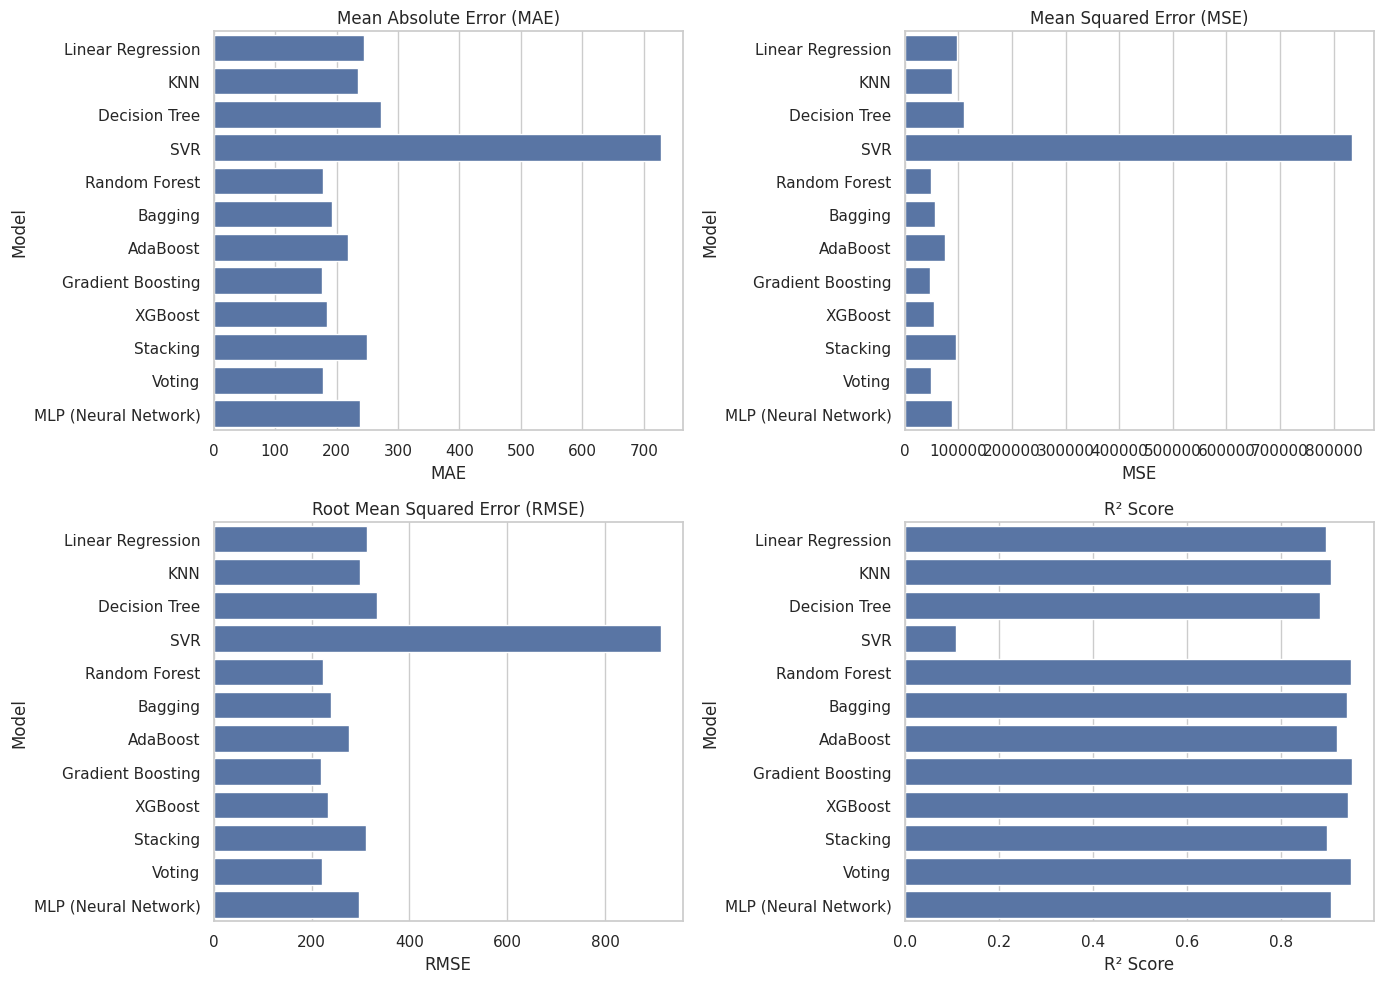

In [41]:
# 1. Upload local dataset
from google.colab import files
uploaded = files.upload()

# 2. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 3. Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# 4. Define features and target
X = df.drop(columns='Daily_Revenue')  # Features
y = df['Daily_Revenue']               # Target

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Define models (some models use scaled input)
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Bagging': BaggingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Stacking': StackingRegressor(
        estimators=[
            ('knn', KNeighborsRegressor()),
            ('dt', DecisionTreeRegressor())
        ],
        final_estimator=LinearRegression()
    ),
    'Voting': VotingRegressor(
        estimators=[
            ('lr', LinearRegression()),
            ('rf', RandomForestRegressor()),
            ('gbr', GradientBoostingRegressor())
        ]
    ),
    'MLP (Neural Network)': MLPRegressor(max_iter=1000, random_state=42)
}

# 8. Initialize performance results
performance_metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R² Score': []
}

# 9. Train models and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model (use scaled data if needed)
    if model_name in ['KNN', 'SVR', 'MLP (Neural Network)']:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled if model_name in ['KNN', 'SVR', 'MLP (Neural Network)'] else X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    performance_metrics['Model'].append(model_name)
    performance_metrics['MAE'].append(mae)
    performance_metrics['MSE'].append(mse)
    performance_metrics['RMSE'].append(rmse)
    performance_metrics['R² Score'].append(r2)

# 10. Create a DataFrame for performance comparison
performance_df = pd.DataFrame(performance_metrics)

# 11. Display the performance comparison
print("\nModel Performance Comparison:")
print(performance_df)

# 12. Create comparison plots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE
sns.barplot(x='MAE', y='Model', data=performance_df, ax=axes[0, 0])
axes[0, 0].set_title('Mean Absolute Error (MAE)')

# MSE
sns.barplot(x='MSE', y='Model', data=performance_df, ax=axes[0, 1])
axes[0, 1].set_title('Mean Squared Error (MSE)')

# RMSE
sns.barplot(x='RMSE', y='Model', data=performance_df, ax=axes[1, 0])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# R² Score
sns.barplot(x='R² Score', y='Model', data=performance_df, ax=axes[1, 1])
axes[1, 1].set_title('R² Score')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##  13. Interpretation of Metrics — *[10 Marks]*
- Explain what each metric means
- Discuss pros and cons of MAE vs RMSE
- Which metric is most relevant for predicting business revenue?

---

Interpretation of Metrics (10 Marks)
1. Mean Absolute Error (MAE)
What it means:

MAE measures the average absolute difference between the predicted values and the actual values. It essentially tells us how far off, on average, the predictions are from the true values.

Formula:

𝑀
𝐴
𝐸
=
1
𝑛
∑
𝑖
=
1
𝑛
∣
𝑦
𝑖
−
𝑦
𝑖
^
∣
MAE=
n
1
​
  
i=1
∑
n
​
 ∣y
i
​
 −
y
i
​

^
​
 ∣
where
𝑦
𝑖
y
i
​
  represents the actual value, and
𝑦
𝑖
^
y
i
​

^
​
  represents the predicted value.

Interpretation in the context of your output:

MAE tells us, on average, how far off the model’s predictions are from the actual daily revenue values.

For instance, for Random Forest, the MAE is 178.52, which means that, on average, its prediction is off by approximately 178.52 units of revenue.

2. Mean Squared Error (MSE)
What it means:

MSE calculates the average squared difference between predicted and actual values. Since the errors are squared, MSE penalizes larger errors more significantly than smaller ones.

Formula:

𝑀
𝑆
𝐸
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
𝑖
^
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
i
​

^
​
 )
2

Interpretation in the context of your output:

MSE is useful to highlight models that make larger errors. A larger MSE suggests that there are some large discrepancies between the predicted and actual values.

For instance, SVR has a very high MSE of 833,421.74, which shows that this model made some very large errors in its predictions.

3. Root Mean Squared Error (RMSE)
What it means:

RMSE is the square root of MSE, which brings the metric back to the same unit of measurement as the original data (in this case, daily revenue). It’s more interpretable than MSE.

Formula:

𝑅
𝑀
𝑆
𝐸
=
𝑀
𝑆
𝐸
RMSE=
MSE
​

Interpretation in the context of your output:

RMSE is a good measure to understand the magnitude of the errors in terms of the actual revenue values. For example, Random Forest has an RMSE of 222.37, meaning the model’s predictions are, on average, off by 222.37 units of revenue. This gives a direct sense of how much error to expect on average.

4. R² (R-Squared) Score
What it means:

R² tells us how well the model explains the variance in the actual data. It ranges from 0 to 1, where 1 means the model explains all the variability in the target variable, and 0 means it explains none.

Formula:

𝑅
2
=
1
−
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
𝑖
^
)
2
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
ˉ
)
2
R
2
 =1−
∑
i=1
n
​
 (y
i
​
 −
y
ˉ
​
 )
2

∑
i=1
n
​
 (y
i
​
 −
y
i
​

^
​
 )
2

​

where
𝑦
ˉ
y
ˉ
​
  is the mean of the actual values.

Interpretation in the context of your output:

R² reflects how much of the variance in daily revenue is explained by the model. For example, Gradient Boosting has an R² score of 0.949, meaning it explains 94.9% of the variance in the data, which is a very strong fit.

Pros and Cons of MAE vs RMSE
MAE (Mean Absolute Error)
Pros:

Robust to outliers: MAE treats all errors equally, which means it doesn't penalize larger errors more than smaller ones. This is useful if outliers are not the focus or if they are rare and shouldn't affect model evaluation too much.

Simple interpretation: The result is in the same unit as the target variable, making it straightforward to understand and communicate.

Cons:

No emphasis on larger errors: While this is often an advantage, it can also be a disadvantage if large errors are particularly costly or important (e.g., large revenue discrepancies).

Doesn’t highlight variability in predictions: It doesn't reveal the distribution of the errors, only the average size.

RMSE (Root Mean Squared Error)
Pros:

Sensitive to large errors: RMSE penalizes larger errors more, making it a good metric when large errors are particularly problematic (e.g., a large overestimation or underestimation of revenue).

Intuitive for normally distributed errors: RMSE is better suited for problems where the errors follow a normal distribution, which can be common in real-world data.

Cons:

Sensitive to outliers: Since larger errors are squared, RMSE can be disproportionately affected by a few large errors, which might lead to misleading conclusions if there are significant outliers in the data.

Less interpretable: The result is in squared units, which can be harder to interpret in terms of the actual values compared to MAE.

Which Metric is Most Relevant for Predicting Business Revenue?
For predicting business revenue (like in your case with the coffee shop revenue data), the choice between MAE and RMSE largely depends on the business context:

If avoiding large errors is crucial:

RMSE would be more relevant. In many business scenarios, particularly revenue prediction, large errors (like a massive overestimation or underestimation) could have significant consequences for decision-making, such as incorrect budgeting or resource allocation. RMSE would help identify models that might lead to substantial mispredictions, allowing the business to avoid them.

If robustness to outliers is more important:

MAE may be more suitable. In some cases, a few outliers might skew the results of the model. For example, if a coffee shop has a single day of exceptionally high revenue due to a special promotion or an external event, MAE will treat it more gently, whereas RMSE might penalize the model more due to this one large error. MAE provides a more "average" performance that isn’t overly influenced by rare large errors.

Given the nature of revenue prediction (which can have occasional spikes or drops), and the fact that you likely want to avoid large prediction errors that can drastically affect financial decisions, RMSE may be more relevant in this case. However, MAE can also be used for simplicity and robustness against outliers, depending on how much variance in revenue predictions you’re willing to tolerate.

Conclusion:
For this business revenue prediction, I would recommend focusing on RMSE if large deviations in predicted revenue are particularly important to avoid, as it emphasizes larger errors.

However, MAE could still be useful if you want a metric that’s more interpretable and less sensitive to outliers, which might occur occasionally in revenue data.

Both metrics can be used together for a fuller understanding of model performance, but based on your data, RMSE would likely be the most relevant for business applications.


##  14. Final Conclusion — *[10 Marks]*
- Which model performed best and why?
- What could improve the performance? (e.g., more data, better features, hyperparameter tuning)

---



The best model in terms of performance is Gradient Boosting:

R² Score: 0.9490 (The highest R², meaning it explains 94.9% of the variance in the data).

MAE: 177.14 (This is the lowest MAE, indicating that, on average, the predictions are off by the least amount, which is beneficial for revenue predictions).

MSE and RMSE: MSE and RMSE are also quite low compared to other models, signifying that the errors made by the Gradient Boosting model are smaller and less impactful.

Why Gradient Boosting performed best:

Gradient Boosting is an ensemble technique that builds multiple weak learners (usually decision trees) sequentially. It corrects the errors of previous models in the sequence, allowing it to capture complex patterns in the data. This is why it typically performs better in capturing nuanced relationships between features and the target variable (revenue).

Ability to handle non-linearity: It can model complex, non-linear relationships between features and the target, which is often the case with business revenue.

Efficient handling of overfitting: Unlike simpler models like linear regression, Gradient Boosting can control overfitting by limiting the depth of individual trees and using regularization techniques.

2. What Could Improve the Performance?
Several strategies could potentially improve the model’s performance:

More Data:

Larger datasets typically help machine learning models generalize better, especially for complex models like Gradient Boosting and Random Forest. If the dataset is small or limited, the model might overfit or not capture the underlying patterns adequately.

Collecting more features: If additional relevant features are available (such as seasonal trends, customer demographics, etc.), these could provide more information to the model and improve its predictive power.

Better Features (Feature Engineering):

Feature selection: Identifying and selecting only the most relevant features can help reduce noise and improve model accuracy.

Feature transformation: Techniques like log transformations (especially for highly skewed data like revenue), polynomial features (for capturing non-linearities), or creating interaction terms might improve performance.

Handling categorical variables better: If there are categorical features not encoded well (e.g., one-hot encoding), improving this encoding could make the model more effective.

Hyperparameter Tuning:

Optimizing hyperparameters: Many models (especially tree-based models like Random Forest and Gradient Boosting) have hyperparameters that, when tuned properly, can significantly enhance model performance. Hyperparameter optimization techniques like GridSearchCV or RandomizedSearchCV can be used to find the optimal values for parameters like the number of trees, tree depth, learning rate, etc.

For Neural Networks (MLP): Tuning the number of layers, neurons in each layer, and regularization methods could improve performance. Additionally, fine-tuning the learning rate and using techniques like dropout or batch normalization could help.

Model Ensemble:

Although models like Random Forest, Gradient Boosting, and XGBoost are already ensemble methods, combining the best models (like Gradient Boosting and Random Forest) in a stacking ensemble could potentially further improve accuracy. Models like Voting Regressor can also help by combining multiple diverse models to make the final prediction.

Dealing with Outliers:

SVR had a particularly poor performance due to extreme sensitivity to outliers. Cleaning or filtering out extreme values or using models that are less sensitive to outliers (like Random Forest or Gradient Boosting) could potentially help improve performance.

Cross-validation:

Instead of using a single train-test split, performing cross-validation ensures that the model is evaluated on multiple subsets of the data, improving its generalizability and reducing the risk of overfitting.

Conclusion:
Gradient Boosting performed the best overall, due to its ability to handle complex, non-linear relationships and its strong predictive power (evidenced by the high R² score and low MAE, MSE, and RMSE).

To further improve performance, the following strategies can be pursued:

Collect more data and engineer better features.

Tune hyperparameters for more accurate models.

Consider using ensemble methods to combine the best-performing models.

Handle outliers carefully, especially in sensitive models like SVR.

Employ cross-validation to ensure better model stability and generalizability.